In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df = sns.load_dataset('penguins').rename(columns={'sex': 'gender'})
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


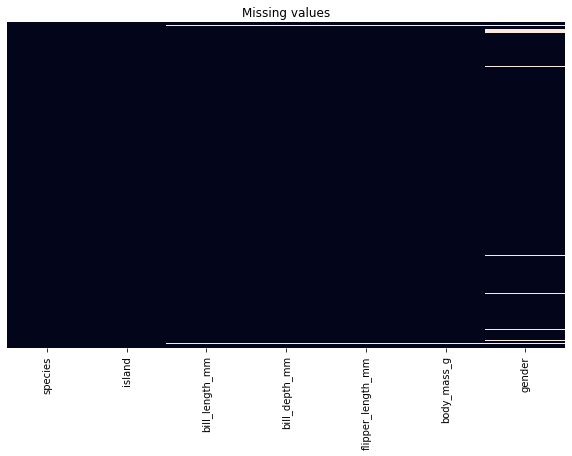

In [3]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title("Missing values");

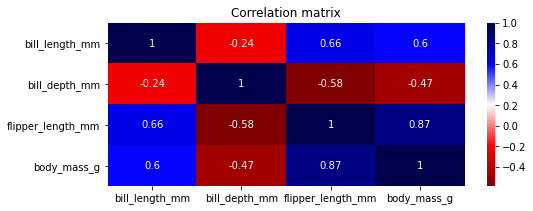

In [4]:
plt.figure(figsize=(8, 3))
sns.heatmap(df.corr(), annot=True, cmap='seismic_r')
plt.title("Correlation matrix");

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


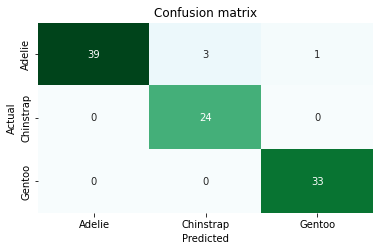

In [5]:
# Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Create list of numerical column names
numerical = list(df.select_dtypes('number').columns)
print(numerical)
# Partition data keeping only numerical non-missing columns
X = df.dropna()[numerical]
y = df.dropna()['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=1)
# Fit simple model to the data
model = RandomForestClassifier(random_state=123)
model.fit(X_train, y_train)
# Predict
y_test_pred = model.predict(X_test)
# Prepare confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(6, 3.5))
sns.heatmap(cm, annot=True, cbar=False, cmap='BuGn', ax=ax)
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted')
ax.set_xticklabels(model.classes_)
ax.set_ylabel('Actual')
ax.set_yticklabels(model.classes_, 
                   fontdict={'verticalalignment': 'center'});

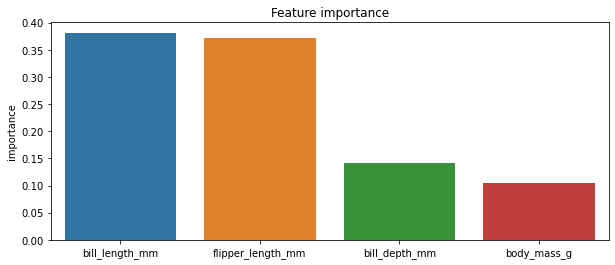

In [6]:
# Map feature importance to variable names
importances = pd.DataFrame(model.feature_importances_, 
                           index=X_train.columns, 
                           columns=['importance'])
importances.sort_values('importance', ascending=False, inplace=True)
# Plot feature importance
plt.figure(figsize=(10, 4))
sns.barplot(data=importances, x=importances.index, y='importance')
plt.title('Feature importance');

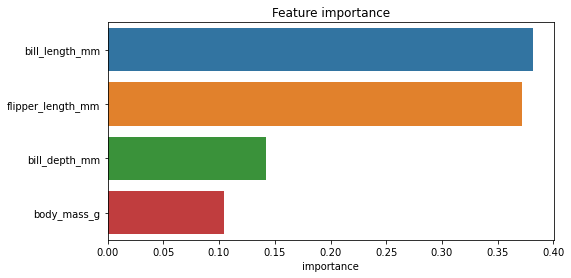

In [7]:
plt.figure(figsize=(8, 4))
sns.barplot(data=importances, x='importance', y=importances.index)
plt.title('Feature importance');

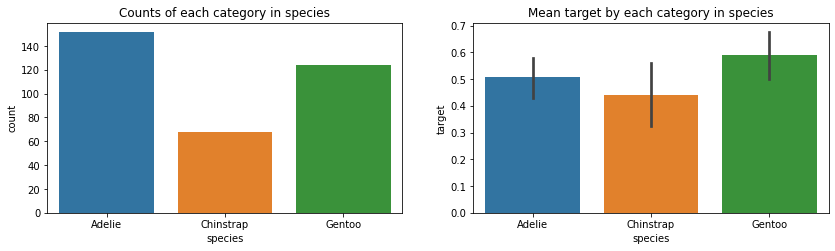

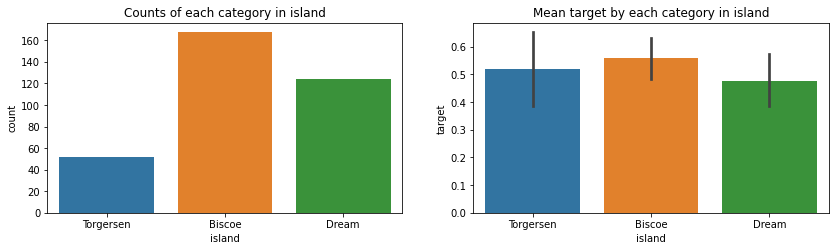

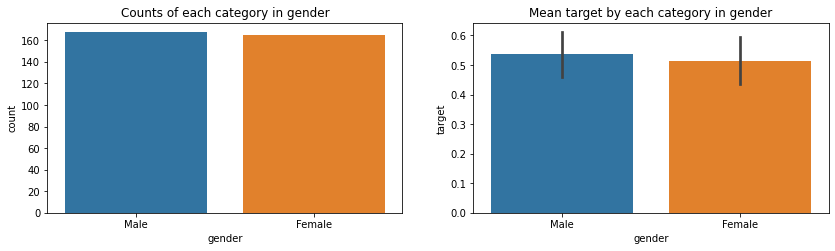

In [8]:
# Import package
import numpy as np
# Create random target
np.random.seed(123)
df['target'] = np.random.randint(0, 2, df.shape[0])
# Create list of categorical column names
categorical = list(df.select_dtypes(exclude='number').columns)
# Plot counts for non-numerical variables
for var in categorical:
    fig, ax = plt.subplots(1, 2, figsize=(14, 3.5))    
    sns.countplot(x=var, data=df, ax=ax[0])
    ax[0].set_title(f"Counts of each category in {var}")
    
    sns.barplot(x=var, y='target', data=df, ax=ax[1])
    ax[1].set_title(f"Mean target by each category in {var}");

In [10]:
import seaborn as sns
print(sns.__version__)

0.11.0


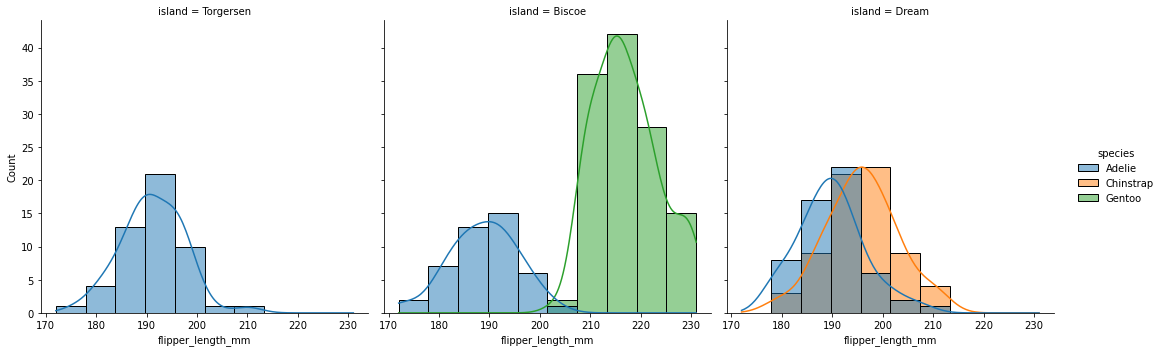

In [11]:
sns.displot(
    data=df, kind="hist", kde=True,
    x="flipper_length_mm", col="island", hue="species",
)

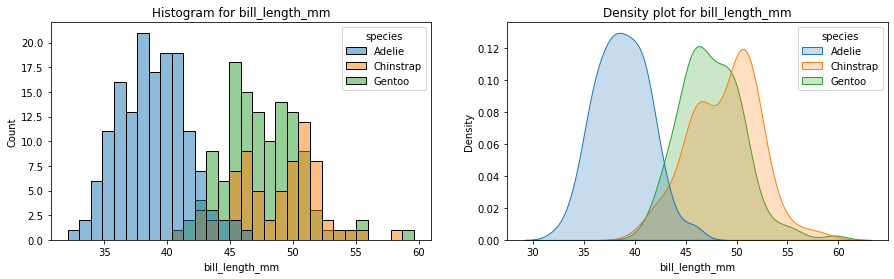

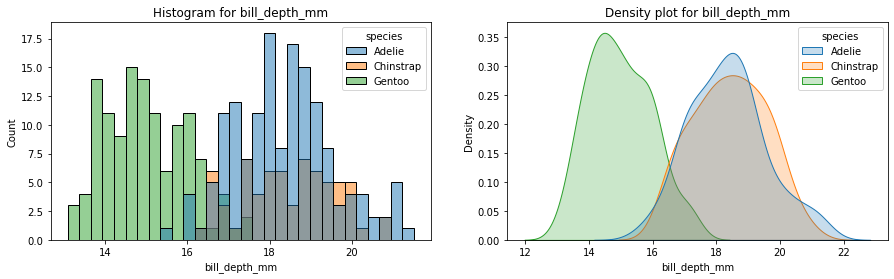

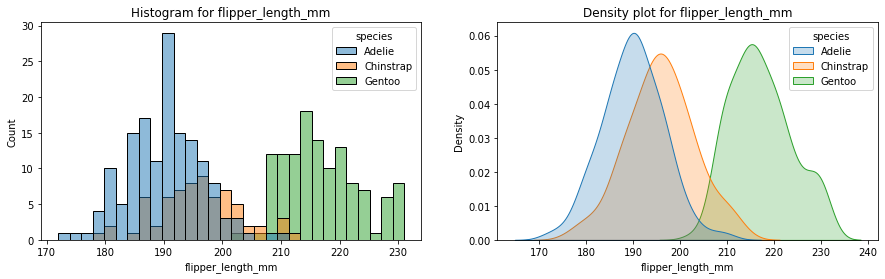

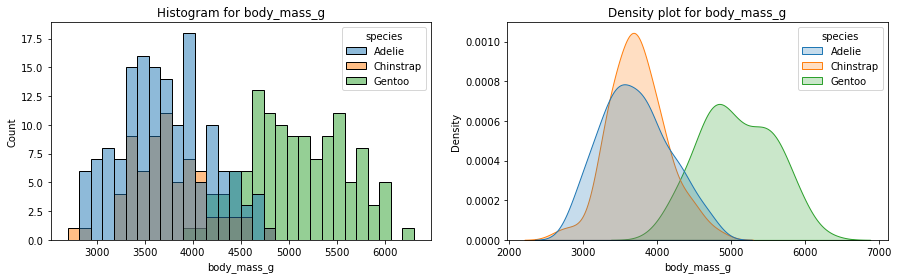

In [12]:
for var in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    sns.histplot(df, x=var, hue='species', bins=30, ax=ax[0])
    ax[0].set_title(f"Histogram for {var}")
    sns.kdeplot(data=df, x=var, hue='species', shade=True, 
                common_norm=False, ax=ax[1])  
    ax[1].set_title(f"Density plot for {var}")

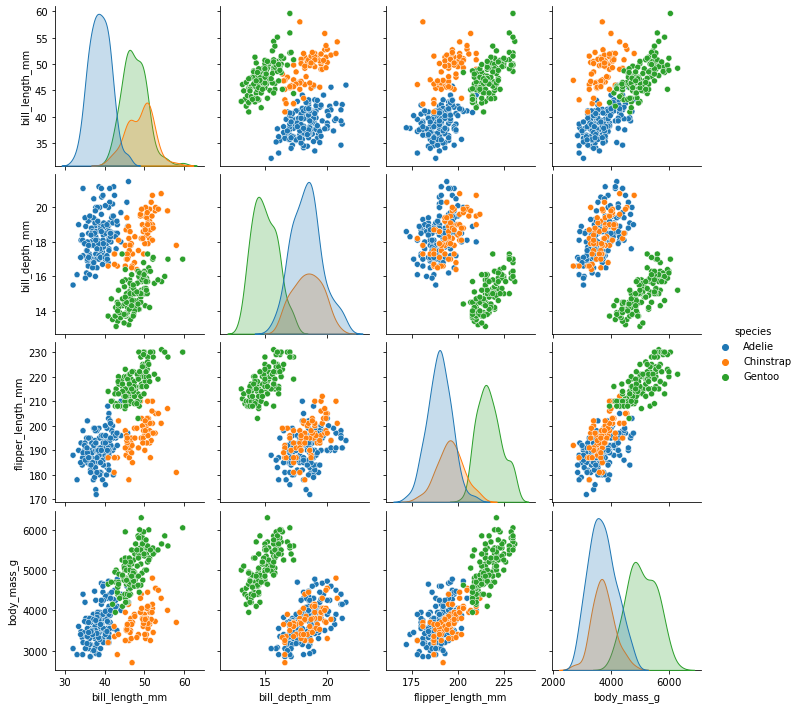

In [13]:
sns.pairplot(df.drop(columns='target'), hue='species');

In [14]:
from platform import python_version
print(python_version())

3.8.3


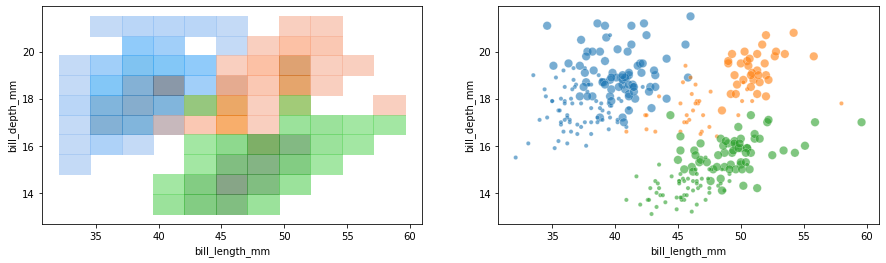

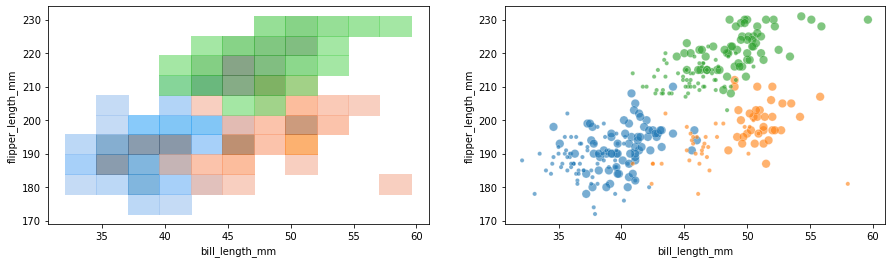

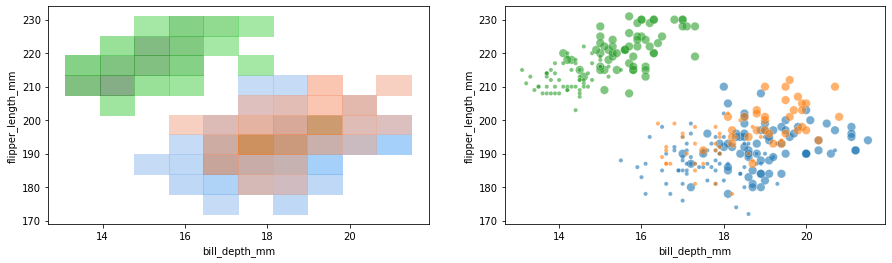

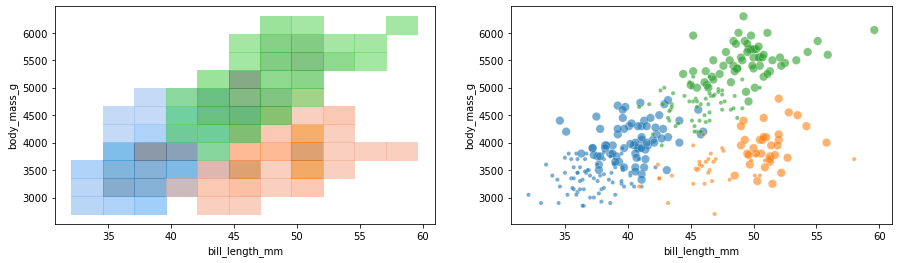

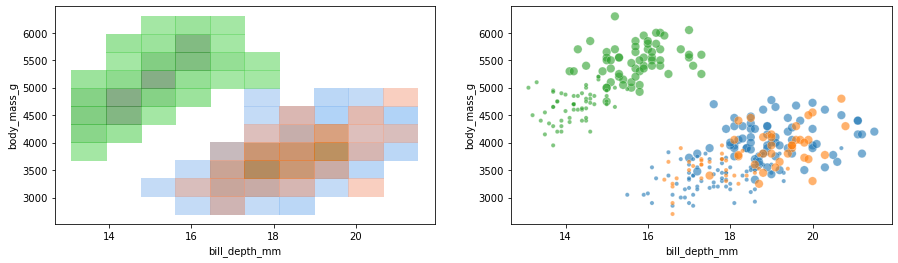

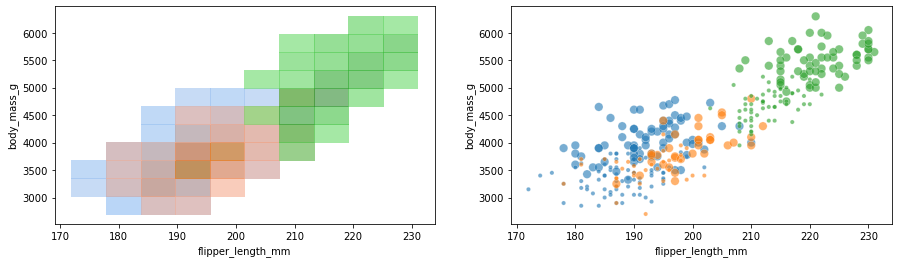

In [15]:
previous = []
for i, var in enumerate(numerical):    
    if i > 0:
        for p_var in previous:
            fig, ax = plt.subplots(1, 2, figsize=(15,4))
            sns.histplot(df, x=p_var, y=var, hue='species', 
                         alpha=0.6, ax=ax[0])
            ax[0].get_legend().remove()
            sns.scatterplot(data=df, x=p_var, y=var, hue='species',
                            size='gender', alpha=0.6, ax=ax[1])
            ax[1].get_legend().remove();
    previous.append(var)

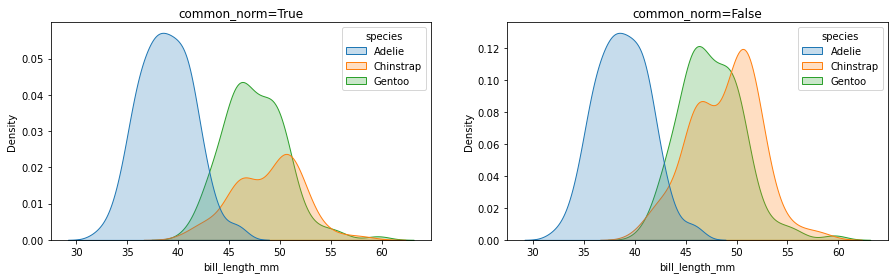

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.kdeplot(data=df, x=numerical[0], hue='species', shade=True,
            ax=ax[0])
ax[0].set_title(f"common_norm=True")
sns.kdeplot(data=df, x=numerical[0], hue='species', shade=True, 
            common_norm=False, ax=ax[1])  
ax[1].set_title(f"common_norm=False");